# Rozkłady dyskretne
1. Rozkład dwupunktowy
2. Rozkład dwumianowy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Zadanie
Dla rozkładu dwupunktowego i dwumianowego:
1. Zdefiniuj zmienną losową dla tego rozkładu prawdopobieństtwa.
2. Narysuj funkcję rozkładu prawdopodobieństwa.
3. Narysuj dystrybuantę.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.
7. Porównaj teoretyczną i zaaobserwowaną funkcję rozkładu prawdopobieństwa.

### Rozkład dwupunktowy - $Bern(p)$

Zmienna losowa $X$ ma **rozkład dwupunktowy** z parametrem $0 < p < 1$, jeżeli
$$
    P(X=1)=p, \quad P(X=0)=1-p.
$$

Zmienna losowa $X$ opisuje pojedyncze doświadczenie, o którym można myśleć w kategorii ,,sukces--porażka'': 
- zmienna przyjmuje wartość 1 z prawdopodobieństwem $p$, jeżeli w danym doświadczeniu zaistniał **,,sukces''**, oraz
- zmienna przyjmuje wartość 0 z prawdopodobieństwem $1-p$, jeżeli w doświadczeniu zainstniała **,,porażka''**.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html

#### Wybrane metody

`rvs(p, loc=0, size=1)` 	Random variates.

`pmf(x, p, loc=0)` 	Probability mass function.

`cdf(x, p, loc=0)` 	Cumulative density function.

`sf(x, p, loc=0)` 	Survival function (1-cdf — sometimes more accurate).

`ppf(q, p, loc=0)` 	Percent point function (inverse of cdf — percentiles).

`stats(p, loc=0, moments=’mv’)` 	Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

`median(p, loc=0)` 	Median of the distribution.

`mean(p, loc=0)` 	Mean of the distribution.

`var(p, loc=0)` 	Variance of the distribution.

`std(p, loc=0)` 	Standard deviation of the distribution.

In [2]:
# 1. Rozkład prawdopodobieństwa

p = 0.5

bern = stats.bernoulli(p=p)
bern

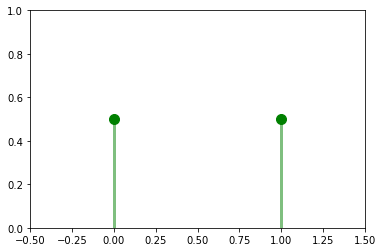

In [3]:
# 2. Gęstość prawdopodobieństwa

fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 1.5])
ax.set_ylim([0, 1])

x_value = [0, 1]
ax.plot(x_value, bern.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
#x : scalar or 1D array_like (indexes where to plot the lines)
#ymin, ymax : scalar or 1D array_like

ax.vlines(x_value, 0, bern.pmf(x_value), colors='g', lw=3, alpha=0.5)

In [4]:
print(bern.pmf(0))

0.5


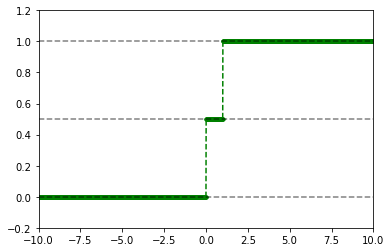

In [5]:
# 3. cdf = Cumulative density function = dystrybuanta

fig, ax = plt.subplots(1, 1)

ax.set_xlim([-10, 10])
ax.set_ylim([-0.2, 1.2])

x = np.arange(-10, 10, 0.01)
ax.plot(x, bern.cdf(x), 'go--', ms=3, label='bernoulli cdf')

ax.axhline(xmin=-5, xmax=5, y=0, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=0.5, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=1, color='black', alpha=0.5, linestyle='--')

plt.show()

In [6]:
print(bern.cdf(2) - bern.cdf(0))  # P(0<X<=2) = P(X=1)

0.5


In [7]:
# 4. Podstawowe statystyki

print(bern.stats('mvsk'))
print(np.sqrt(bern.stats('v')))

(array(0.5), array(0.25), array(0.), array(-2.))
0.5


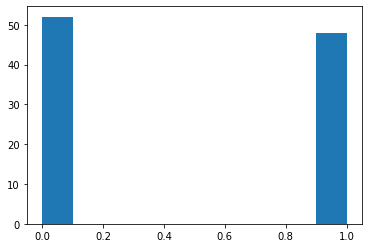

In [8]:
# 5. Próbka z rozkładu dwupunktowego oraz 6. Histogram
x = bern.rvs(size = 100)

plt.hist(x)
plt.show()

[0.52 0.48]


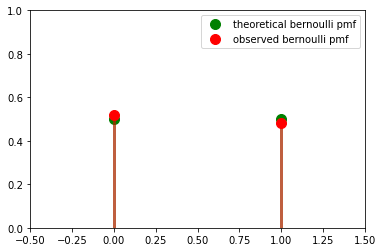

In [9]:
# 7. porównanie teoretycznej i zaobserwowanej funkcji rozkładu prawdopodobieństwa

fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 1.5])
ax.set_ylim([0, 1])

x_value = np.array([0, 1])
unique, counts = np.unique(x, return_counts=True)
y_obs = np.array(counts/x.size)

print(y_obs)

ax.plot(x_value, bern.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
ax.vlines(x_value, 0, bern.pmf(x_value), colors='g', lw=3, alpha=0.5)

ax.plot(x_value, y_obs, 'ro', ms=10, label='observed bernoulli pmf')
ax.vlines(x_value, 0, y_obs, colors='r', lw=3, alpha=0.5)

plt.legend()
plt.show()

### Rozkład dwumianowy - $Bin(n, p)$
Zmienna losowa $X$ ma **rozkład dwumianowy** z parametrami $0<p<1$ oraz $n\in\mathbb{N}$, jeżeli
$$
    P(X=k)=\binom{n}{k}p^k(1-p)^{n-k} \quad \text{dla} \quad k=0,1,\ldots,n.
$$

Zmienna losowa $X$ przyjmuje wartości równe liczbie ,,sukcesów'' w~$n$~niezależnych doświadczeniach z prawdopodobieństwem sukcesu $p$ w każdym z~nich. 

W szczególności zmienną $X$ możemy przedstawić jako $$X=S_n=\sum_{i=1}^n X_i,$$ gdzie $X_i \sim \text{Bern}(p)$ oraz $(X_i)_{i=1}^n$ są wzajemnie niezależne.


https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html

In [10]:
# 1. Rozkład prawdopodobieństwa

n, p = 6, 0.5

binom = stats.binom(n=n, p=p)

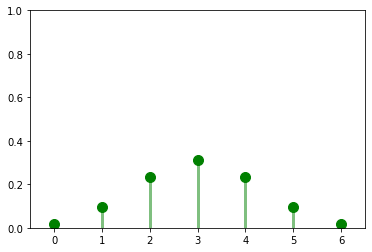

In [11]:
# 2. Gęstość prawdopodobieństwa

fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 6.5])
ax.set_ylim([0, 1])

x_value = [0, 1,2,3,4,5,6]
ax.plot(x_value, binom.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
#x : scalar or 1D array_like (indexes where to plot the lines)
#ymin, ymax : scalar or 1D array_like

ax.vlines(x_value, 0, binom.pmf(x_value), colors='g', lw=3, alpha=0.5)

[0.       0.015625 0.109375 0.34375  0.65625  0.890625 0.984375 1.      ]


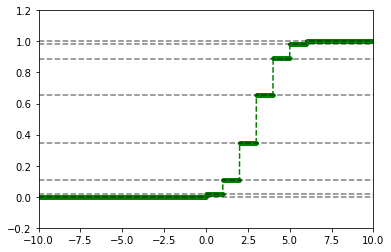

In [12]:
# 3. cdf = Cumulative density function = dystrybuanta

fig, ax = plt.subplots(1, 1)

ax.set_xlim([-10, 10])
ax.set_ylim([-0.2, 1.2])

x = np.arange(-10, 10, 0.01)
ax.plot(x, binom.cdf(x), 'go--', ms=3, label='binomial cdf')

print(np.unique(binom.cdf(x)))

ax.axhline(xmin=-5, xmax=5, y=0, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=0.015, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=0.109, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=0.343, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=0.656, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=0.890, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=0.984, color='black', alpha=0.5, linestyle='--')
ax.axhline(xmin=-5, xmax=5, y=1, color='black', alpha=0.5, linestyle='--')

plt.show()

In [13]:
# 4. Podstawowe statystyki

print(binom.stats('mv'))
print(np.sqrt(binom.stats('v')))

(array(3.), array(1.5))
1.224744871391589


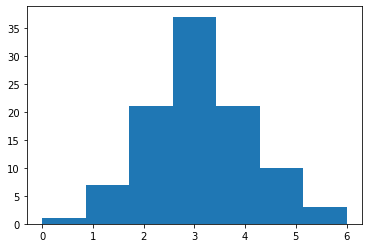

In [14]:
# 5. Próbka z rozkładu dwumianowego oraz 6. Histogram
x = binom.rvs(size=100)

plt.hist(x, bins=len(np.unique(x)))
plt.show()

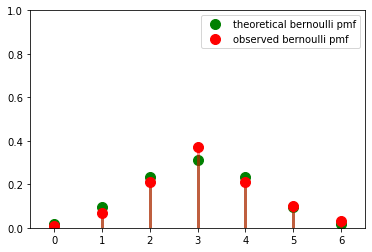

In [15]:
# 7. porównanie teoretycznej i zaobserwowanej funkcji rozkładu prawdopodobieństwa

fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 6.5])
ax.set_ylim([0, 1])

x_value = np.unique(x)
unique, counts = np.unique(x, return_counts=True)
y_obs = np.array(counts/x.size)

ax.plot(x_value, binom.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
ax.vlines(x_value, 0, binom.pmf(x_value), colors='g', lw=3, alpha=0.5)

ax.plot(x_value, y_obs, 'ro', ms=10, label='observed bernoulli pmf')
ax.vlines(x_value, 0, y_obs, colors='r', lw=3, alpha=0.5)

plt.legend()
plt.show()

### Zadania - dodatkowe

1. Oblicz prawdopodobieństwo $P(X=5)$, pod warunkiem, że zmienna losowa X ma rozkład dwumianowy z parametrami $n=10$ i $p=0.7$?

**Wskazówka**: $$P(X=x_0)=F(x_0)-F(x_0^-),$$gdzie $F(x_0^-)$ oznacza granicę lewostronną dystrybuanty $F$ w punkcie $x_0$.

In [16]:
n, p = 10, 0.7
binom = stats.binom(n=n, p=p)

In [17]:
binom.cdf(5) - binom.cdf(4)

0.10291934520000003

2. Oblicz prawdopodobieństwo tego, że rzucając cztery razy kostką wyrzucimy trzy razy ,,trójkę''.

In [21]:
n, p = 4, 1/6
binom = stats.binom(n=n, p=p)

In [24]:
binom.cdf(3) - binom.cdf(2)

0.015432098765432167

3. Szacuje się, że aż 70% Polaków posiada kartę kredytową. Jakie jest prawdopodobieństwo, że w losowej grupie 10 osób więcej niż cztery osóby będą posiadały kartę kredytową?

**Wskazówka**: $P(X>k)=1-P(X\leq k) = 1- F(k)$.

In [45]:
n, p = 10, 0.7
binom = stats.binom(n=n, p=p)

In [46]:
1 - binom.cdf(4)

0.9526510126